# Wrapper Qwen2.5-VL-3B

### Load Model

In [1]:
import os
os.environ["HF_HOME"] = "/tmp/huggingface_cache"

In [2]:
!echo $HF_HOME

/tmp/huggingface_cache


In [3]:
from wrapper.local_llm import LocalLLM
model_id="Qwen/Qwen2.5-VL-3B-Instruct"
system_prompt = "Detect all signatures and return their locations and labels in the form of coordinates. "
model=LocalLLM(model_id=model_id, system_prompt=system_prompt)

/users/eleves-a/2025/youssef.sidhom/Object_detection_in_documents/venv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
model.load()

⚙️ Loading Qwen/Qwen2.5-VL-3B-Instruct (4-bit: False)...


The image processor of type `Qwen2VLImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. Note that this behavior will be extended to all models in a future release.
/users/eleves-a/2025/youssef.sidhom/Object_detection_in_documents/venv/lib64/python3.9/site-packages/transformers/models/auto/modeling_auto.py:2284: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(
`torch_dtype` is deprecated! Use `dtype` instead!
Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]


✅ Model Ready.


## inference one image

In [6]:
image_path="data/images/test_image_152_png_jpg.rf.6336141e7564a9d7e3317f18684228bc_orig.jpg"
raw_output=model.predict(image_path, prompt="Detect all signatures in the image and return their locations and labels.")
final_answer=model.postprocess(raw_output[0])
height, width = raw_output[1], raw_output[2]


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


In [7]:
final_answer

[{'bbox_2d': [268, 517, 413, 549], 'label': 'signatures'}]

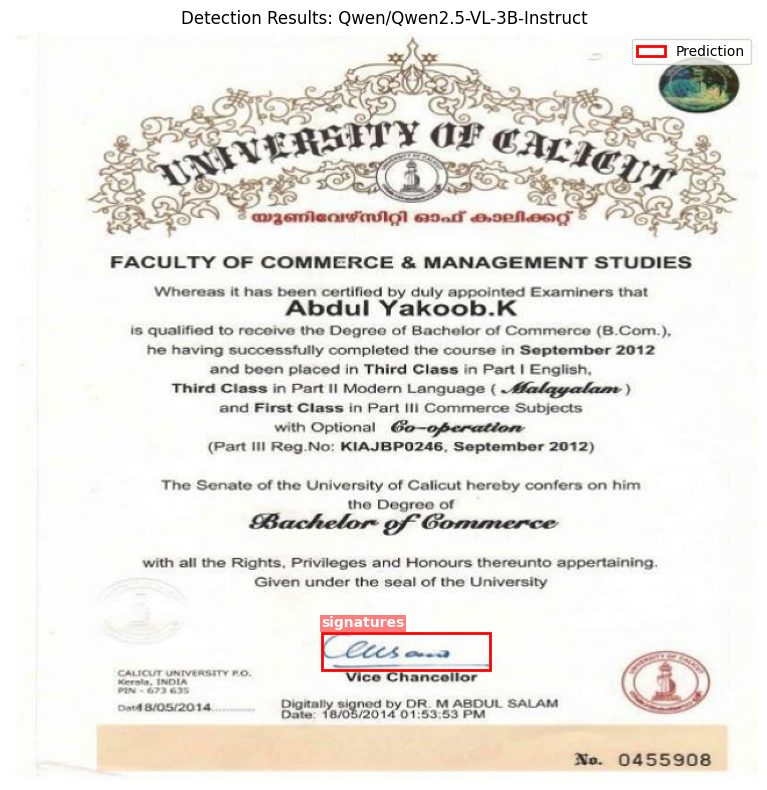

In [8]:
model.plot_bounding_boxes(image_path, final_answer,height,width,normalize=False)

## Fine-Tuning 

In [ ]:
model.train(train_data="./data/train.jsonl", val_data="./data/valid.jsonl", output_dir="./output", image_dir="./data/images", epochs=3, batch_size=2, num_workers=4)

🚀 Starting Optimized Training for Qwen/Qwen2.5-VL-3B-Instruct...
🛠️ Applying LoRA (Rank: 16)...


/users/eleves-a/2025/youssef.sidhom/Object_detection_in_documents/wrapper/local_llm.py:346: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()


trainable params: 37,152,768 || all params: 3,791,775,744 || trainable%: 0.9798
📦 Loading Datasets...
📂 Loading dataset from: ./data/train.jsonl
✅ Loaded 5293 raw samples.
📂 Loading dataset from: ./data/valid.jsonl
✅ Loaded 511 raw samples.
⚡ Using PagedAdamW8bit for memory efficiency.


Epoch 1/3:   0%|          | 0/2647 [00:00<?, ?it/s]/users/eleves-a/2025/youssef.sidhom/Object_detection_in_documents/venv/lib64/python3.9/site-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
Epoch 1/3:   0%|          | 0/2647 [00:03<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 2.32 GiB. GPU 0 has a total capacity of 19.53 GiB of which 1.55 GiB is free. Process 29715 has 1.44 GiB memory in use. Process 1267365 has 1.51 GiB memory in use. Process 1604088 has 246.00 MiB memory in use. Process 1462608 has 714.00 MiB memory in use. Including non-PyTorch memory, this process has 13.93 GiB memory in use. Of the allocated memory 13.57 GiB is allocated by PyTorch, and 166.17 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

: 